# Simulación de eventos discretos, Teoría de colas
## Integrantes:
- **José Miguel Zayas Pérez** (tlgrm: @nex25k) _____ C312
- **Adrián Hernández Santos** (tlgrm: @ahdez929) _____ C311

In [13]:
from simulation import simulate_call_center

### Ejemplo
Se realiza una simulación para 5 empleados y se visualizan los resultados obtenidos.

In [14]:
from analysis import *

PARAMETERS = {
    'time': 180, 
    'operators': 5,
    'duration_mean': 6,
    'arrival_mean': 3
}
PARAMETERS_ANALIZE = {
    'time': 180, 
    'operators': PARAMETERS['operators'],
    'operator_costxhour': 24,
    'profitxcall': 210,
    'porcentage_lost_calls': 0.6,
}

sim_result = simulate_call_center(PARAMETERS)

analize = Analizer(sim_result, PARAMETERS_ANALIZE)

print(analize)



        Calls: 50
        Successful calls: 49
        Lost calls: 1
        Average call duration: 4.705393864506837
        Max call duration: 16.298958978181506
        Min call duration: 0.06932634979350322
        Total time: 174.06328991972316
        Lost money: 126.0
        Employees: 5
        Employees cost: 960
        Profit: 9204.0
        


Se realizan 2000 simulaciones para cada empleado y se va guardando la información de cada una.

In [15]:

simulation_count = 2000

data_w_employees = []
for employees_cant in range(3,10):
    data = []
    for i in range(simulation_count):
        PARAMETERS['operators'] = employees_cant
        PARAMETERS_ANALIZE['operators'] = employees_cant
        simu_result = simulate_call_center(PARAMETERS)
        analize = Analizer(simu_result, PARAMETERS_ANALIZE)
        data.append(analize)
    data_w_employees.append((employees_cant, data))

Se procesan los datos obtenidos anteriormente y se calculan diferentes valores estadísitcos, posteriormente se grafican y se muestran los resultados obtenidos.

El precio de un empleado en 8h es 192

Analisis para 3 empleados

    Calls: 58.2615
    Successful calls: 46.183
    Lost calls: 12.0785
    Average call duration: 5.863643799605625
    Max call duration: 25.751949682619976
    Min call duration: 0.12677056950378734
    Lost money: 1521.891
    Total time: 171.53181947270815
    Profit: 7600.539
    
Analisis para 4 empleados

    Calls: 58.191
    Successful calls: 52.7725
    Lost calls: 5.4185
    Average call duration: 5.821580276695772
    Max call duration: 26.53945556958772
    Min call duration: 0.11036835233718649
    Lost money: 682.731
    Total time: 170.86571268071188
    Profit: 9631.494
    
Analisis para 5 empleados

    Calls: 58.0135
    Successful calls: 55.95
    Lost calls: 2.0635
    Average call duration: 5.805759232137531
    Max call duration: 26.52223581655871
    Min call duration: 0.10702321224392615
    Lost money: 260.001
    Total time: 171.20434140234218
    Profit: 10529.499
    
Analisis para 6 emplea

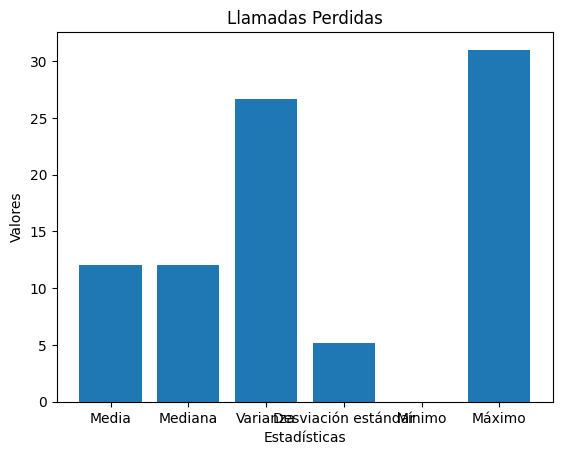

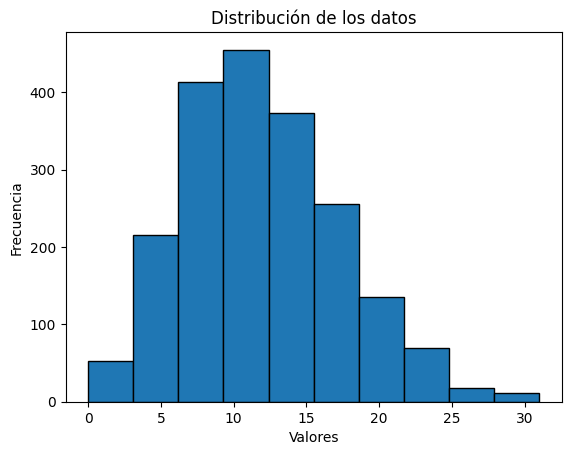


        Dinero Perdido
        Media: 1521.891
        Mediana: 1512.0
        Varianza: 423545.290119
        Desviacion: 650.8035726077417
        Minimo: 0.0
        Maximo: 3906.0
        


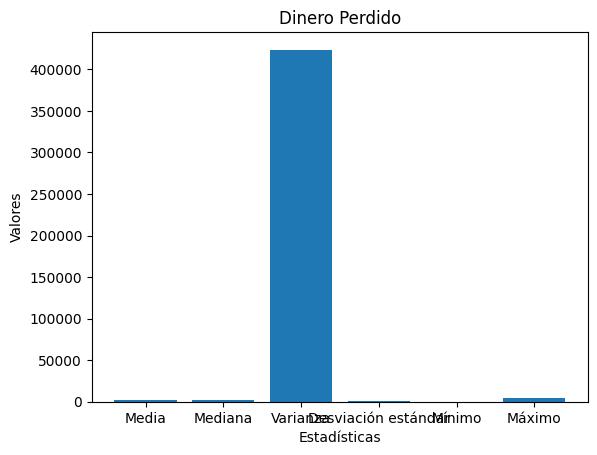

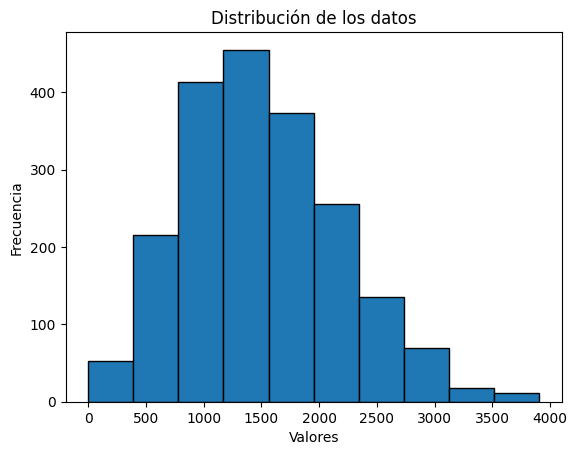


        Llamadas Perdidas
        Media: 5.4185
        Mediana: 5.0
        Varianza: 12.966357749999998
        Desviacion: 3.6008829125646393
        Minimo: 0
        Maximo: 21
        


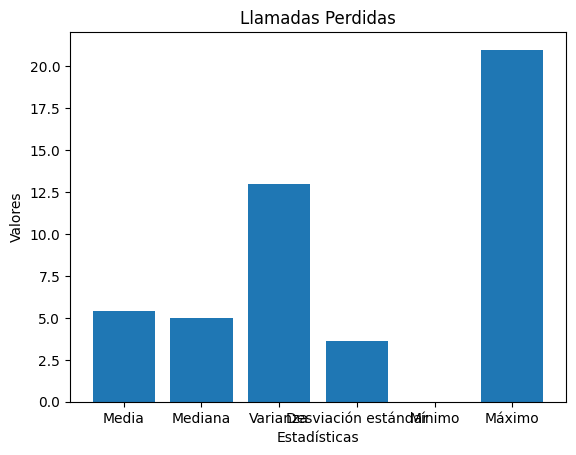

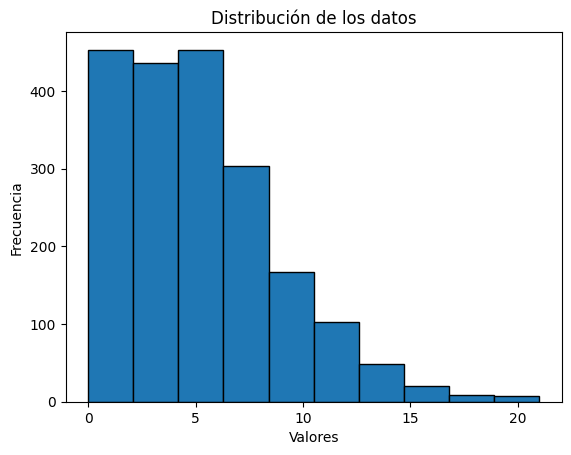


        Dinero Perdido
        Media: 682.731
        Mediana: 630.0
        Varianza: 205853.895639
        Desviacion: 453.7112469831446
        Minimo: 0.0
        Maximo: 2646.0
        


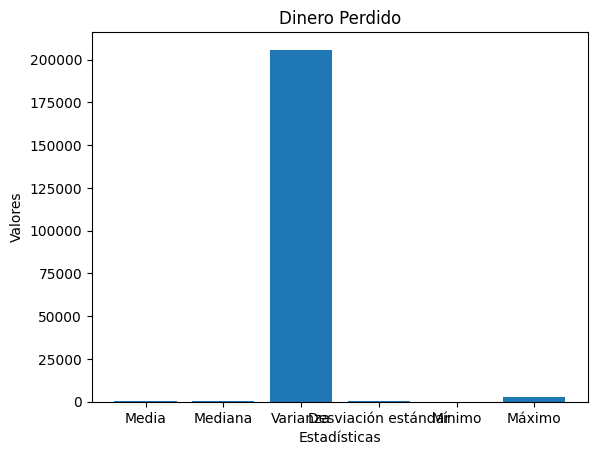

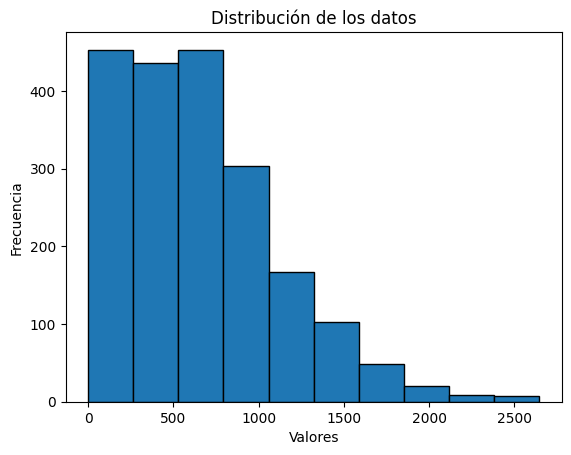


        Llamadas Perdidas
        Media: 2.0635
        Mediana: 2.0
        Varianza: 4.486467750000001
        Desviacion: 2.1181283601330683
        Minimo: 0
        Maximo: 15
        


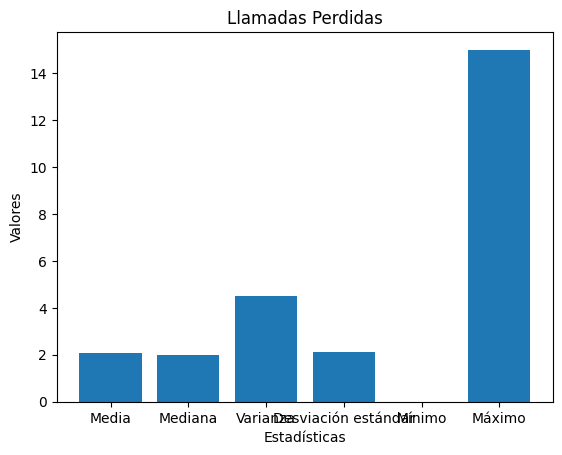

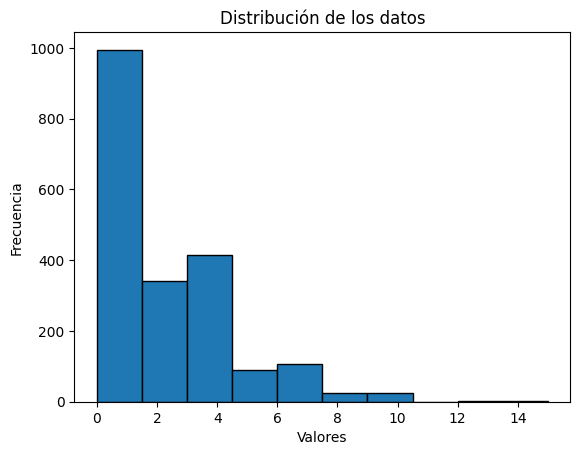


        Dinero Perdido
        Media: 260.001
        Mediana: 252.0
        Varianza: 71227.16199900002
        Desviacion: 266.8841733767666
        Minimo: 0.0
        Maximo: 1890.0
        


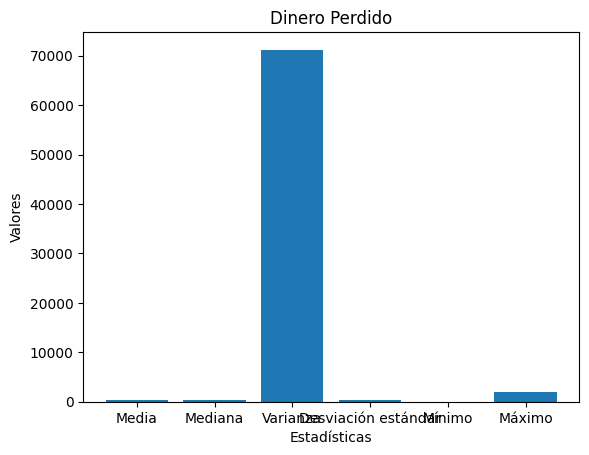

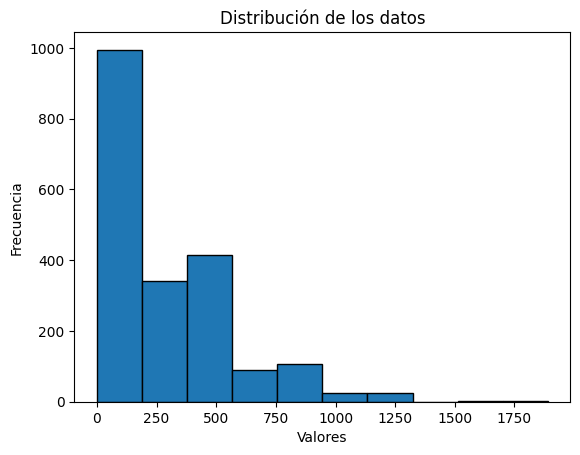


        Llamadas Perdidas
        Media: 0.647
        Mediana: 0.0
        Varianza: 1.3203909999999999
        Desviacion: 1.1490826776172374
        Minimo: 0
        Maximo: 11
        


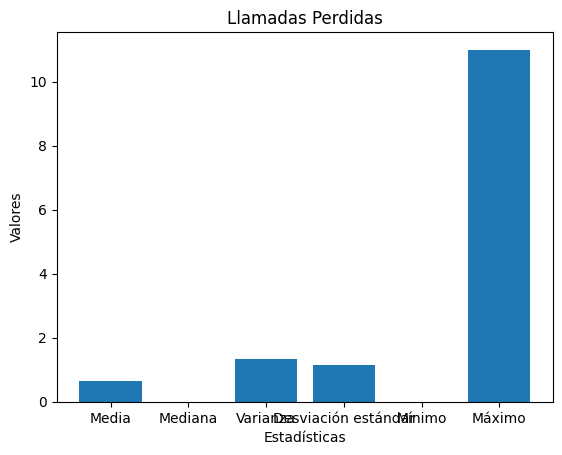

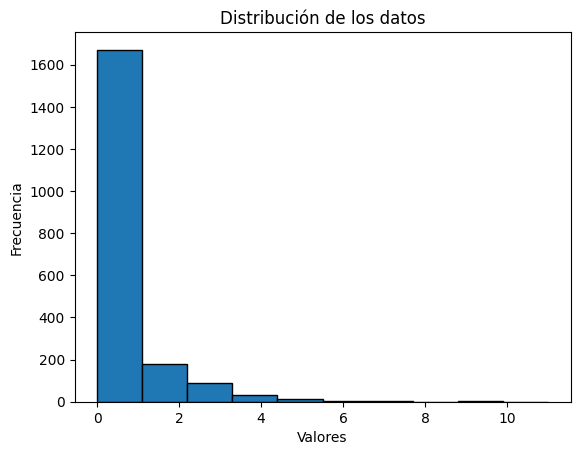


        Dinero Perdido
        Media: 81.522
        Mediana: 0.0
        Varianza: 20962.527516000002
        Desviacion: 144.78441737977192
        Minimo: 0.0
        Maximo: 1386.0
        


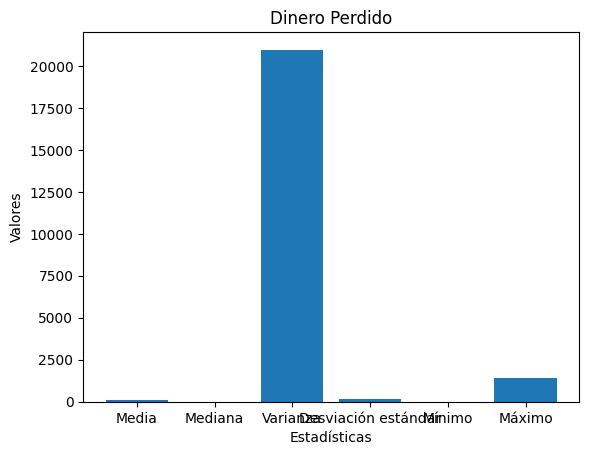

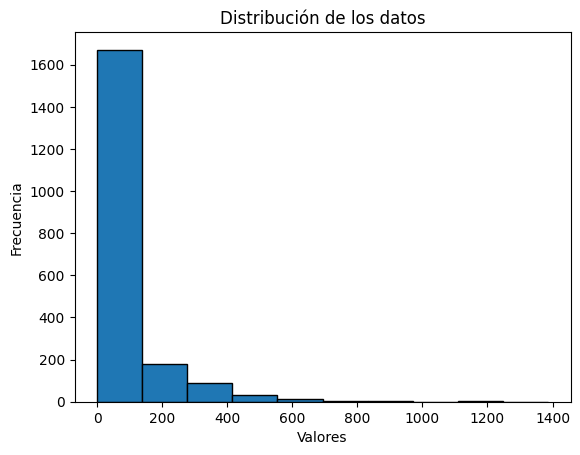


        Llamadas Perdidas
        Media: 0.164
        Mediana: 0.0
        Varianza: 0.276104
        Desviacion: 0.5254559924484637
        Minimo: 0
        Maximo: 5
        


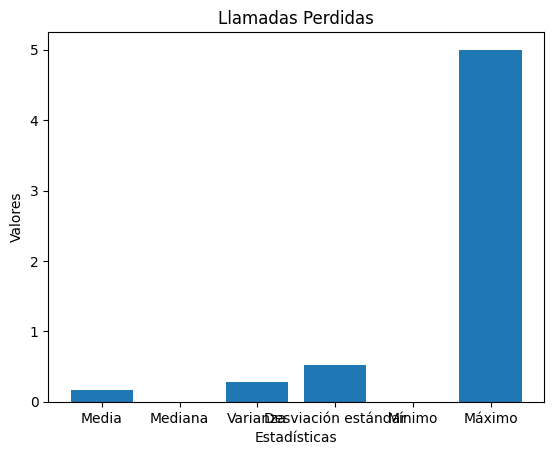

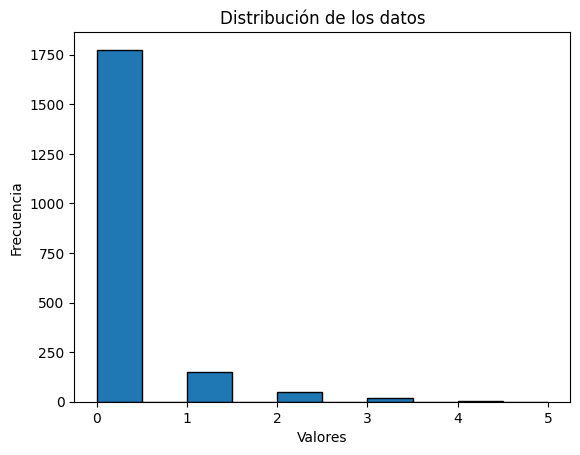


        Dinero Perdido
        Media: 20.664
        Mediana: 0.0
        Varianza: 4383.427104
        Desviacion: 66.20745504850643
        Minimo: 0.0
        Maximo: 630.0
        


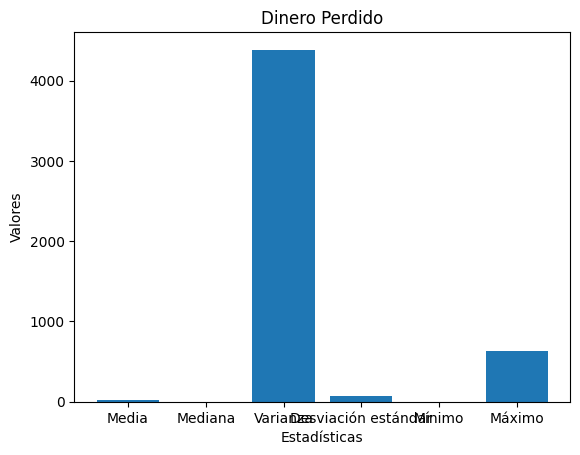

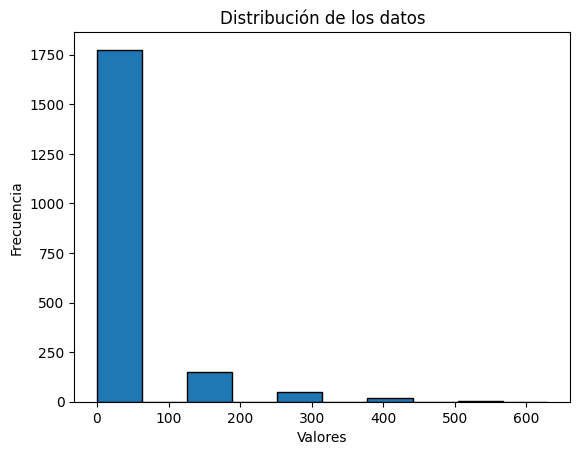


        Llamadas Perdidas
        Media: 0.0385
        Mediana: 0.0
        Varianza: 0.05801775000000001
        Desviacion: 0.24086874018851015
        Minimo: 0
        Maximo: 3
        


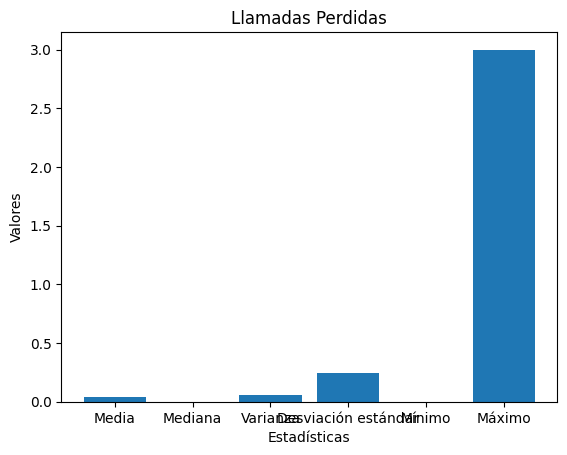

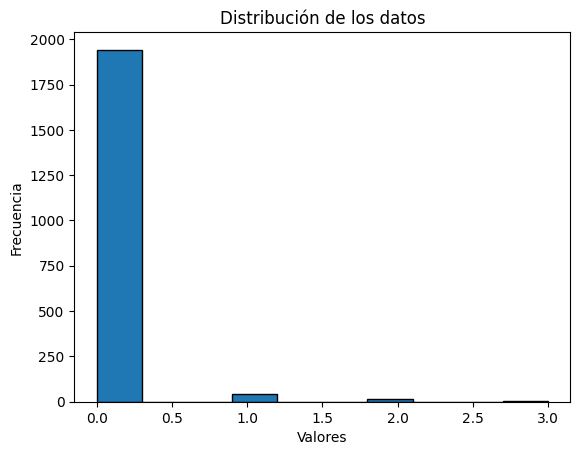


        Dinero Perdido
        Media: 4.851
        Mediana: 0.0
        Varianza: 921.089799
        Desviacion: 30.34946126375228
        Minimo: 0.0
        Maximo: 378.0
        


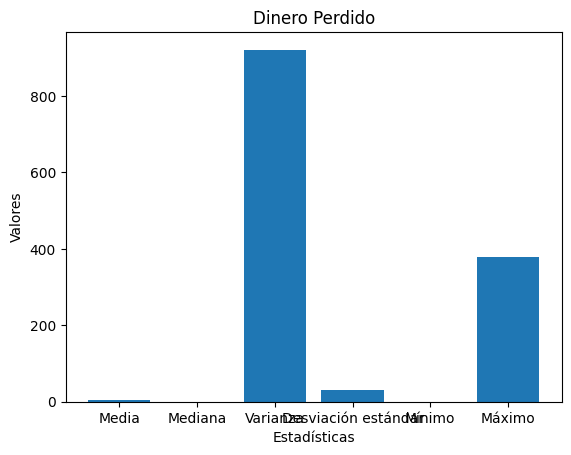

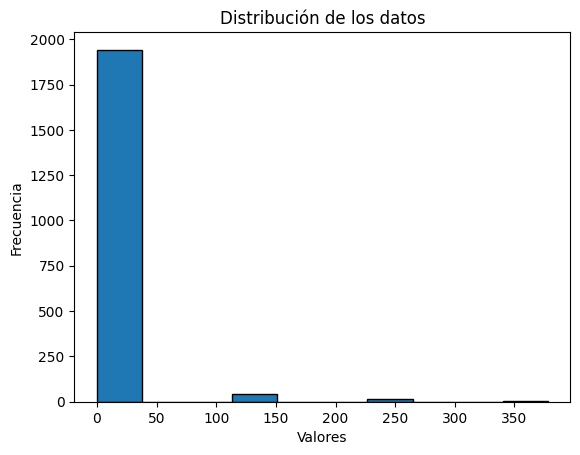


        Llamadas Perdidas
        Media: 0.007
        Mediana: 0.0
        Varianza: 0.006950999999999999
        Desviacion: 0.08337265738837883
        Minimo: 0
        Maximo: 1
        


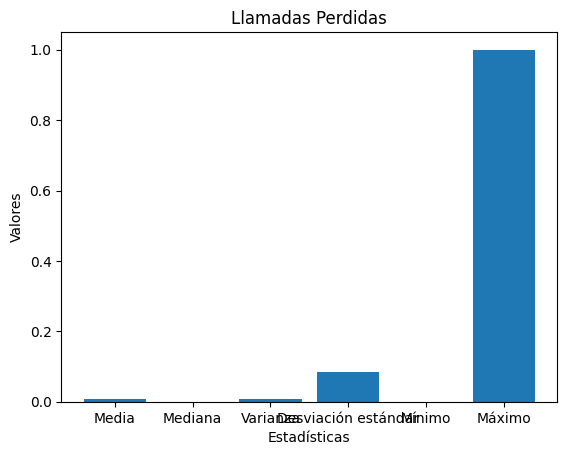

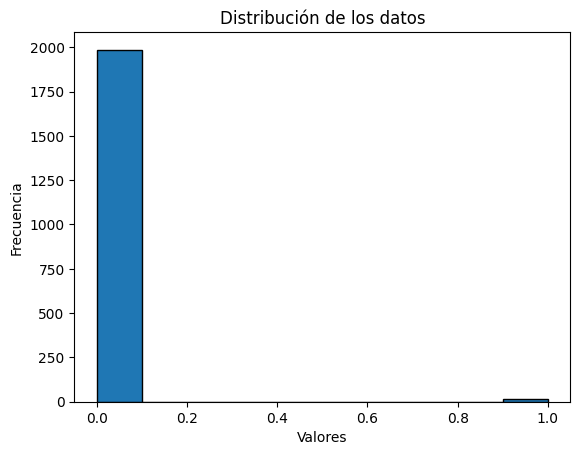


        Dinero Perdido
        Media: 0.882
        Mediana: 0.0
        Varianza: 110.354076
        Desviacion: 10.504954830935734
        Minimo: 0.0
        Maximo: 126.0
        


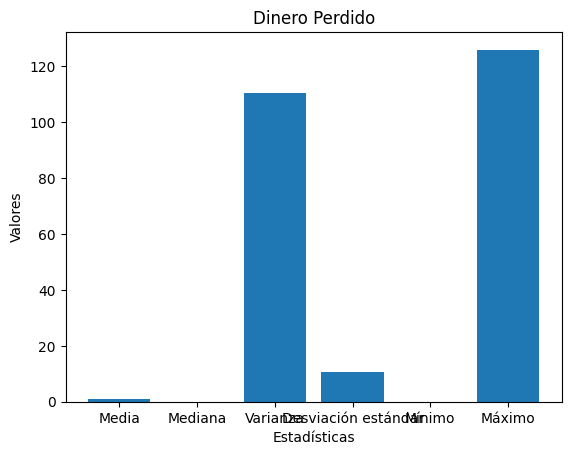

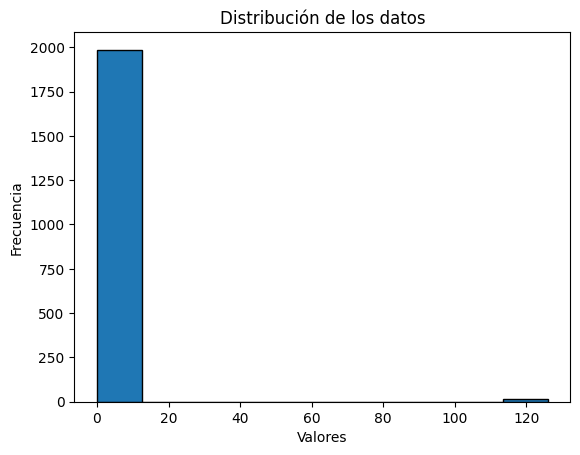

In [16]:
from utils import s_data, analysis, print_means

print("El precio de un empleado en 8h es {0}".format(8*24))
print()
for employees, data in data_w_employees:
    print(f"Analisis para {employees} empleados")
    calls, successful_calls, lost_calls, average_call_duration, max_call_duration, min_call_duration, lost_money, total_time, profit = s_data(data)
    print_means(calls, successful_calls, lost_calls, average_call_duration, max_call_duration, min_call_duration, lost_money, total_time, profit)
    
for employees, data in data_w_employees:
    calls, successful_calls, lost_calls, average_call_duration, max_call_duration, min_call_duration, lost_money, total_time, profit = s_data(data)
    analysis(lost_calls,"Llamadas Perdidas",True)
    analysis(lost_money,"Dinero Perdido",True)

In [17]:
# formula de Erlang (M/M/C/C)
import math



def erlang(lambd, mu, c, n):
    p0 = 0
    for i in range(c+1):
        p0 += (lambd/mu)**i / math.factorial(i)
    pn = ((lambd/mu)**n / math.factorial(n)) / p0
    return pn

lambd = 1/3
mu = 1/6
r = lambd / mu

def erlang_pc(r,c):
    num= (r**c / math.factorial(c)) 
    den = ([r**i / math.factorial(i) for i in range(c+1)])
    return num / sum(den)

def erlang_L(r, Pc):
    return r *(1 - Pc)

def erlang_W(Pc, L, lambd):
    return L / (lambd * (1 - Pc))

for i in range(3,8):
    print(f"Para {i} empleados")
    pc = erlang_pc(2,i)
    l = erlang_L(2, pc)
    w = erlang_W(pc, l, lambd)
    print(f"Probabilidad del sistema lleno: {pc}")
    print(f"Número medio de clientes en el sistema: {l}")
    print(f"Tiempo medio de estancia en el sistema: {w}")


Para 3 empleados
Probabilidad del sistema lleno: 0.21052631578947367
Número medio de clientes en el sistema: 1.5789473684210527
Tiempo medio de estancia en el sistema: 6.0
Para 4 empleados
Probabilidad del sistema lleno: 0.09523809523809523
Número medio de clientes en el sistema: 1.8095238095238095
Tiempo medio de estancia en el sistema: 6.0
Para 5 empleados
Probabilidad del sistema lleno: 0.03669724770642202
Número medio de clientes en el sistema: 1.926605504587156
Tiempo medio de estancia en el sistema: 6.000000000000001
Para 6 empleados
Probabilidad del sistema lleno: 0.012084592145015107
Número medio de clientes en el sistema: 1.9758308157099698
Tiempo medio de estancia en el sistema: 6.0
Para 7 empleados
Probabilidad del sistema lleno: 0.003440860215053764
Número medio de clientes en el sistema: 1.9931182795698925
Tiempo medio de estancia en el sistema: 6.0
